# Introduction to Machine Learning

This lab introduces some basic concepts of machine learning with Python. In this lab you will use the K-Nearest Neighbor (KNN) algorithm to classify the species of iris flowers, given measurements of flower characteristics. By completing this lab you will have an overview of an end-to-end machine learning modeling process.  

By the completion of this lab, you will:
1. Follow and understand a complete end-to-end machine learning process including data exploration, data preparation, modeling, and model evaluation. 
2. Develop a basic understanding of the principles of machine learning and associated terminology. 
3. Understand the basic process for evaluating machine learning models. 

## Overview of KNN classification

Before discussing a specific algorithm, it helps to know a bit of machine learning terminology. In supervised machine learning a set of ***cases*** are used to ***train***, ***test*** and ***evaluate*** the model. Each case is comprised of the values of one or more ***features*** and a ***label*** value. The features are variables used by the model to ***predict** the value of the label. Minimizing the ***errors*** between the true value of the label and the prediction supervises the training of this model. Once the model is trained and tested, it can be evaluated based on the accuracy in predicting the label of a new set of cases. 

In this lab you will use randomly selected cases to first train and then evaluate a k-nearest-neighbor (KNN) machine learning model. The goal is to predict the type or class of the label, which makes the machine learning model a ***classification*** model. 

The k-nearest-neighbor algorithm is conceptually simple. In fact, there is no formal training step. Given a known set of cases, a new case is classified by majority vote of the K (where $k = 1, 2, 3$, etc.) points nearest to the values of the new case; that is, the nearest neighbors of the new case. 

The schematic figure below illustrates the basic concepts of a KNN classifier. In this case there are two features, the values of one shown on the horizontal axis and the values of the other shown on the vertical axis. The cases are shown on the diagram as one of two classes, red triangles and blue circles. To summarize, each case has a value for the two features, and a class. The goal of the KNN algorithm is to classify cases with unknown labels. 

Continuing with the example, on the left side of the diagram the $K = 1$ case is illustrated. The nearest neighbor is a red triangle. Therefore, this KNN algorithm will classify the unknown case, '?', as a red triangle. On the right side of the diagram, the $K = 3$ case is illustrated. There are three near neighbors within the circle. The majority of nearest neighbors for $K = 3$ are the blue circles, so the algorithm classifies the unknown case, '?', as a blue circle. Notice that class predicted for the unknown case changes as K changes. This behavior is inherent in the KNN method.  

![](img/KNN.jpg)
<center> **KNN for k = 1 and k = 3**</center>

There are some additional considerations in creating a robust KNN algorithm. These will be addressed later in this course. 

# EDA
## Examine the data set

In this lab you will work with the Iris data set. This data set is famous in the history of statistics. The first publication using these data in statistics by the pioneering statistician Ronald A Fisher was in 1936. Fisher proposed an algorithm to classify the species of iris flowers from physical measurements of their characteristics. The data set has been used as a teaching example ever since. 

Now, you will load and examine these data which are in the statsmodels.api package. Execute the code in the cell below and examine the first few rows of the data frame. 

In [2]:
import pandas as pd
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn

## Import the dataset from sklearn.datasets
dataset = datasets.load_iris()

In [3]:
print(dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
dataset.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
## Create a data frame from the dictionary
iris = pd.DataFrame(dataset['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
# convert Species from int to string
iris['Species'] = [dataset.target_names[x] for x in dataset.target]
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There are four features, containing the dimensions of parts of the iris flower structures. The label column is the Species of the flower. The goal is to create and test a KNN algorithm to correctly classify the species. 

Next, you will execute the code in the cell below to show the data types of each column. 

In [15]:
# 檢查欄位型態
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_Length    150 non-null float64
Sepal_Width     150 non-null float64
Petal_Length    150 non-null float64
Petal_Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [17]:
# 檢查  the count ofmissing values
iris.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

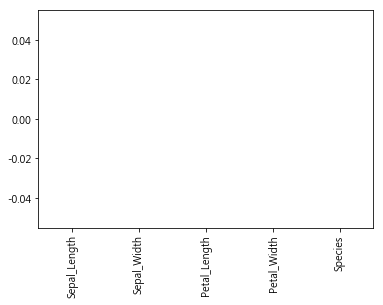

In [39]:
# plot chart for the count of missing value 
%matplotlib inline
import matplotlib.pyplot as plt

# all are zeros, no bars are shown
# (iris.isnull().sum()+2).plot(kind ='bar')
iris.isnull().sum().plot(kind ='bar')

In [36]:
type(iris.isnull().sum())

pandas.core.series.Series

The features are all numeric, and the label is a categorical string variable.

Next, you will determine the number of unique categories, and number of cases for each category, for the label variable, Species. Execute the code in the cell below and examine the results. 

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64
<class 'pandas.core.series.Series'>


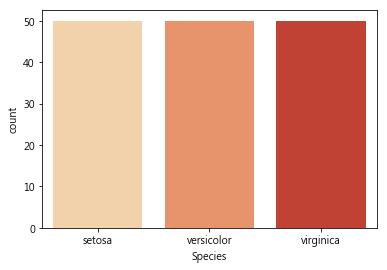

In [34]:
# Examine classes and class imbalance
# if imbalance, we should consider use other metrics instead of accuracy
Species_count = iris['Species'].value_counts()
print(Species_count)
print(type(Species_count))
import seaborn as sns
sns.countplot(x='Species',data=iris, palette="OrRd")

In [28]:
# 與前面指令相同
iris['count'] = 1
iris[['Species', 'count']].groupby('Species').count()

,count
Species,
setosa,50
versicolor,50
virginica,50


You can see there are three species of iris, each with 50 cases. 

Next, you will create some plots to see how the classes might, or might not, be well separated by the value of the features. In an ideal case, the label classes will be perfectly separated by one or more of the feature pairs. In the real-world this ideal situation will rarely, if ever, be the case.
 
There are six possible pair-wise scatter plots of these four features. For now, we will just create scatter plots of two variable pairs. Execute the code in the cell below and examine the resulting plots.
***
**Note:** Data visualization and the Seaborn package are covered in another lesson.
***

### 檢查特徵對目標值的辨識度

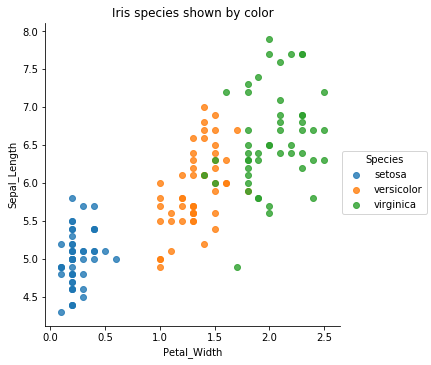

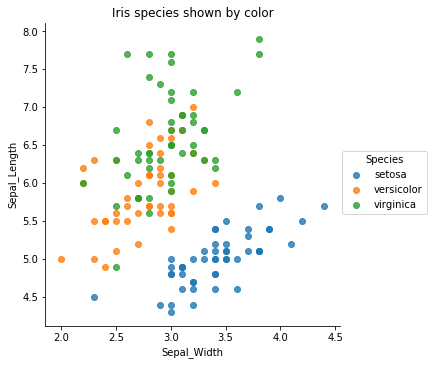

In [28]:
%matplotlib inline
def plot_iris(iris, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x = col1, y = col2, 
               data = iris, 
               hue = "Species", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by color')
    plt.show()
plot_iris(iris, 'Petal_Width', 'Sepal_Length')
plot_iris(iris, 'Sepal_Width', 'Sepal_Length')

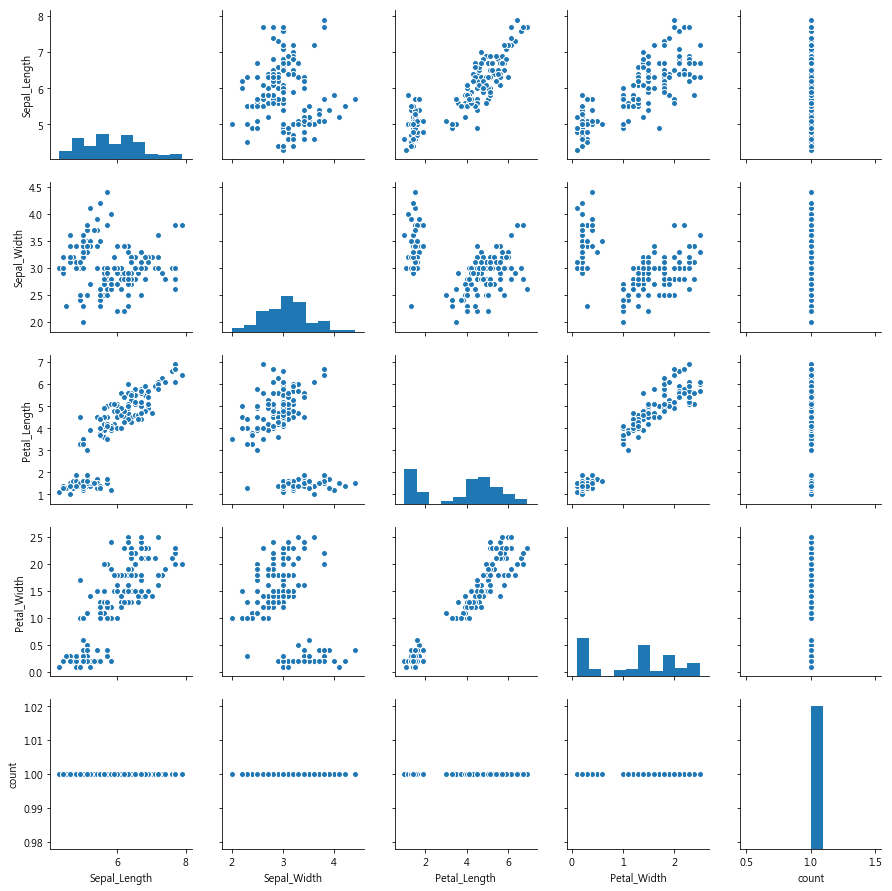

In [31]:
# 檢查變數間是否獨立?
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris)
plt.show()

Examine these results noticing the separation, or overlap, of the label values. 

Then, answer **Question 1** on the course page. 

## Prepare the data set

Data preparation is an important step before training any machine learning model. These data require only two preparation steps:
- Scale the numeric values of the features. It is important that numeric features used to train machine learning models have a similar range of values. Otherwise, features which happen to have large numeric values may dominate model training, even if other features with smaller numeric values are more informative. In this case Zscore normalization is used. This normalization process scales each feature so that the mean is 0 and the variance is 1.0. 
- Split the dataset into randomly sampled training and evaluation data sets. The random selection of cases seeks to limit the leakage of information between the training and evaluation cases.

The code in the cell below normalizes the features by these steps:
- The scale function from scikit-learn.preprocessing is used to normalize the features.
- Column names are assigned to the resulting data frame. 
- A statitical summary of the data frame is then printed. 

***
**Note:** Data preparation with scikit-learn is covered in another lesson. 
***

Execute this code and examine the results. 

In [21]:
# Scaled data has zero mean and unit variance
from sklearn.preprocessing import scale
import pandas as pd
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris_scaled = scale(iris[num_cols])
iris_scaled = pd.DataFrame(iris_scaled, columns = num_cols)
print(iris_scaled.describe().round(3))

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.439        -1.569       -1.444
25%          -0.901       -0.588        -1.228       -1.182
50%          -0.053       -0.125         0.336        0.133
75%           0.675        0.569         0.763        0.791
max           2.492        3.115         1.786        1.711


In [24]:
# verify scaling
print(iris_scaled.mean(axis=0).round(3), iris_scaled.std(axis=0).round(3))

Sepal_Length   -0.0
Sepal_Width    -0.0
Petal_Length   -0.0
Petal_Width    -0.0
dtype: float64 Sepal_Length    1.003
Sepal_Width     1.003
Petal_Length    1.003
Petal_Width     1.003
dtype: float64


Examine these results. The mean of each column is zero and the standard deviation is approximately 1.0.

The methods in the scikit-learn package requires numeric numpy arrays as arguments. Therefore, the strings indicting species must be re-coded as numbers. The code in the cell below does this using a dictionary lookup. Execute this code and examine the head of the data frame. 

In [30]:
# convert Species from string to int，與 相同
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['Species'] = [levels[x] for x in iris['Species']]
iris_scaled.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


Now, you will split the dataset into a test and evaluation sub-sets. The code in the cell below randomly splits the dataset into training and testing subsets. The features and labels are then separated into numpy arrays. The dimension of each array is printed as a check. Execute this code to create these subsets. 

***
**Note:** Splitting data sets for machine learning with scikit-learn is discussed in another lesson.
***

In [31]:
## Split the data into a training and test set by Bernoulli sampling
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = 75)
iris_train_features = iris_split[0][:, :4]
iris_train_labels = np.ravel(iris_split[0][:, 4])
iris_test_features = iris_split[1][:, :4]
iris_test_labels = np.ravel(iris_split[1][:, 4])
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


## Train and evaluate the KNN model

With some understanding of the relationships between the features and the label and preparation of the data completed you will now train and evaluate a $K = 3$ model. The code in the cell below does the following:
- The KNN model is defined as having $K = 3$.
- The model is trained using the fit method with the feature and label numpy arrays as arguments.
- Displays a summary of the model. 

Execute this code and examine the summary of these results.


***
**Note:** Constructing machine learning models with scikit-learn is covered in another lesson.
***

In [32]:
## Define and train the KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Next, you will evaluate this model using the accuracy statistic and a set of plots. The following steps create model predictions and compute accuracy:
- The predict method is used to compute KNN predictions from the model using the test features as an argument. 
- The predictions are scored as correct or not using a list comprehension. 
- Accuracy is computed as the percentage of the test cases correctly classified. 

Execute this code, examine the results, and answer **Question 2** on the course page.

In [33]:
iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
iris_test['predicted'] = KNN_mod.predict(iris_test_features)
iris_test['correct'] = [1 if x == z else 0 for x, z in zip(iris_test['predicted'], iris_test_labels)]
accuracy = 100.0 * float(sum(iris_test['correct'])) / float(iris_test.shape[0])
print(accuracy)

96.0


The accuracy is pretty good.

Now, execute the code in the cell below and examine plots of the classifications of the iris species. 

'Done'

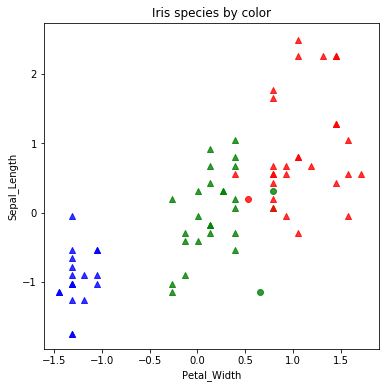

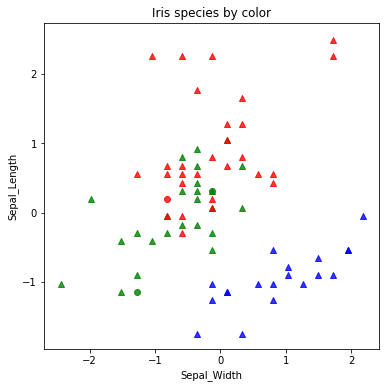

In [34]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['Species'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'
plot_shapes(iris_test, 'Petal_Width', 'Sepal_Length', markers, colors)
plot_shapes(iris_test, 'Sepal_Width', 'Sepal_Length', markers, colors)

In the plots above color is used to show the predicted class. Correctly classified cases are shown by triangles and incorrectly classified cases are shown by circles. 

Examine the plot and answer **Question 3** on the course page.

## Summary

In this lab you have created and evaluated a KNN machine learning classification model. Specifically you have:
1. Loaded and explored the data using visualization to determine if the features separate the classes.
2. Prepared the data by normalizing the numeric features and randomly sampling into training and testing subsets. 
3. Constructing and evaluating the machine learning model. Evaluation was performed by statistically, with the accuracy metric, and with visualization. 